In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import numpy as np

import glob
import os

%matplotlib inline

In [2]:
lat_min=46.5
lon_min=-55
lat_max=49.5
lon_max=-47.5

In [3]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [4]:
stokes = glob.glob('data/stokes_*')
SVPs = glob.glob('data/SVP_*')
spotter = 'data/SPOT-1759_2022-04-18_2022-05-27_download.csv'
oskers = 'data/OSKERS-SpringAZMP2022-20220526.csv'
codes= 'data/davis_DFONL_Spring2022_01-300534061250680-20220526T105035UTC.csv'

In [5]:
def plot_map(ax,lon_min=lon_min, lon_max=lon_max, lat_min=lat_min, lat_max=lat_max):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.drawcoastlines()
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, 1.),labels=[1,0,0,0])
    bmap.drawmeridians(np.arange(lon_min, lon_max,2.),labels=[0,0,0,1])
    return bmap

In [6]:
def plot_bathymetry(bmap, ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    x, y = bmap(lons, lats)
    bathy = etopo.z.values
    levels = [-500, -100,]
    CS = bmap.contour(x,y,bathy,levels, linestyles='solid', linewidth=0.05,colors='lightgrey')
    ax.clabel(CS, CS.levels, inline=True, fmt='%1.0f', fontsize=12)

In [7]:
def plot_spotter(fname, bmap):
    d = pd.read_csv(fname)
    x, y = bmap(d['Longitude (deg)'].values,d['Latitude (deg)'].values)
    bmap.plot(x,y,color='C0', label='Spotter',lw=2)
    bmap.plot(x[-1],y[-1],'s', color='C0', label='__nolabel_')   

In [8]:
def plot_SVPs(files, bmap):
    count=0
    for f in files:
        d = pd.read_csv(f)
        x, y = bmap(d[' LONGITUDE'].values,d[' LATITUDE'].values)
        if count==0:
            bmap.plot(x,y,color='C1', label='SVPs',lw=2)
        else:
            bmap.plot(x,y,color='C1', label='_nolabel__',lw=2)
        bmap.plot(x[-1],y[-1],'s', color='C1', label='__nolabel_')  
        count+=1

In [9]:
def plot_davis(files, bmap):
    count=0
    for f in files:
        d = pd.read_csv(f)
        x, y = bmap(d[' LONGITUDE'].values,d[' LATITUDE'].values)
        if count==0:
            bmap.plot(x,y,color='C4', label='Code-davis',lw=2)
        else:
            bmap.plot(x,y,color='C4', label='_nolabel__',lw=2)
        bmap.plot(x[-1],y[-1],'s', color='C4', label='__nolabel_')  
        count+=1

In [10]:
def plot_stokes(files, bmap):
    count=0
    for f in files:
        if f == 'data/stokes_DFONL_Spring2022_05-300434069507650-20220526T105049UTC.csv':
            continue
        d = pd.read_csv(f)
        print(f)
        d = d[d[' Latitude'].between(-90,90)]
        x, y = bmap(d[' Longitude'].values,d[' Latitude'].values)
        if count==0:
            bmap.plot(x,y,color='C3', label='stokes',lw=2)
        else:
            bmap.plot(x,y,color='C3', label='_nolabel__',lw=2)
        bmap.plot(x[-1],y[-1],'s', color='C3', label='__nolabel_')  
        count+=1

In [11]:
def plot_oskers(file, bmap):
    d = pd.read_csv(file)
    dg = d.groupby('Device')
    count=0
    for name, g in dg:
        x, y = bmap(g['Longitude'].values,g['Latitude'].values)
        if count ==0:
            bmap.plot(x,y,color='C2', label='Osker', lw=2)
        else:
            bmap.plot(x,y,color='C2', label='__nolabel__', lw=2)
        bmap.plot(x[-1],y[-1],'s', color='C2', label='__nolabel_')  
        count+=1

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


data/stokes_DFONL_Spring2022_07-300434065579260-20220526T105052UTC.csv
data/stokes_DFONL_Spring2022_02-300434069506700-20220526T105043UTC.csv
data/stokes_DFONL_Spring2022_04-300434069604340-20220526T105049UTC.csv
data/stokes_DFONL_Spring2022_06-300434066140350-20220526T105051UTC.csv
data/stokes_DFONL_Spring2022_01-300434069606520-20220526T105039UTC.csv
data/stokes_DFONL_Spring2022_03-300434066147340-20220526T105047UTC.csv


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


Text(0.5, 1.0, 'Spring 2022 AZMP Drifters - April 22 to May 26')

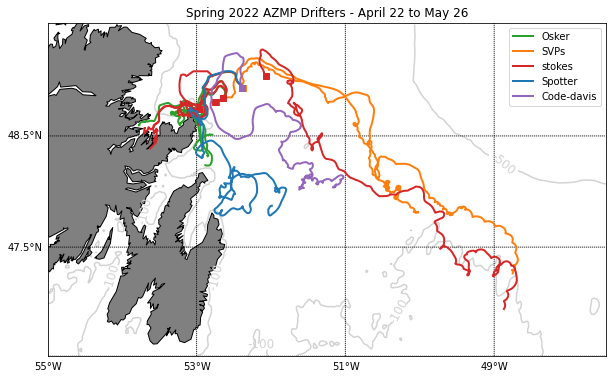

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bmap = plot_map(ax)
plot_bathymetry(bmap,ax,esel)
plot_oskers(oskers, bmap)
plot_SVPs(SVPs, bmap)
plot_stokes(stokes, bmap)
plot_spotter(spotter, bmap)
plot_davis([codes,], bmap)
ax.legend()
ax.set_title('Spring 2022 AZMP Drifters - April 22 to May 26')